In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading dataset

data = pd.read_excel('glass.xlsx',sheet_name='glass')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#### 1. Exploratory Data Analysis (EDA):

In [4]:
data.shape

(214, 10)

In [5]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


##### Check for missing values

In [9]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(1)

In [11]:
data.drop_duplicates(ignore_index=True,inplace=True)

In [12]:
data.duplicated().sum()

np.int64(0)

##### outliers

In [13]:
for col in data:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    upp_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < low_bound) | (data[col] > upp_bound)][col]

    print(f'\n finding for {col}')
    print(f'median = {data[col].median():.2f}')
    print(f'IQR = {IQR:.2f}')
    print(f'lower bound = {low_bound:.2f}, upper bound = {upp_bound:.2f}')
    print(f'number of outliers = {outliers.shape[0]}')


 finding for RI
median = 1.52
IQR = 0.00
lower bound = 1.51, upper bound = 1.52
number of outliers = 17

 finding for Na
median = 13.30
IQR = 0.91
lower bound = 11.54, upper bound = 15.18
number of outliers = 7

 finding for Mg
median = 3.48
IQR = 1.51
lower bound = -0.18, upper bound = 5.87
number of outliers = 0

 finding for Al
median = 1.36
IQR = 0.44
lower bound = 0.53, upper bound = 2.29
number of outliers = 17

 finding for Si
median = 72.79
IQR = 0.81
lower bound = 71.06, upper bound = 74.31
number of outliers = 12

 finding for K
median = 0.56
IQR = 0.48
lower bound = -0.59, upper bound = 1.33
number of outliers = 7

 finding for Ca
median = 8.60
IQR = 0.91
lower bound = 6.88, upper bound = 10.52
number of outliers = 27

 finding for Ba
median = 0.00
IQR = 0.00
lower bound = 0.00, upper bound = 0.00
number of outliers = 38

 finding for Fe
median = 0.00
IQR = 0.10
lower bound = -0.15, upper bound = 0.25
number of outliers = 12

 finding for Type
median = 2.00
IQR = 2.00
lower

#### 2: Data Visualization:

In [14]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
data.corr(numeric_only=True)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


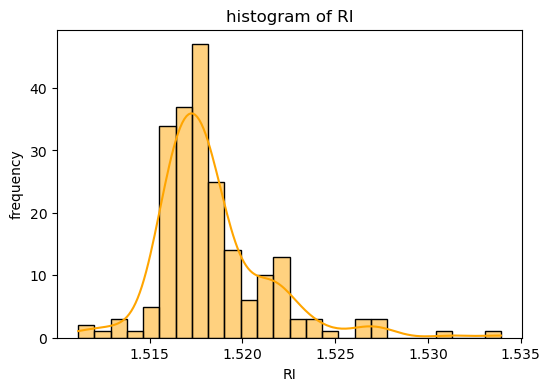

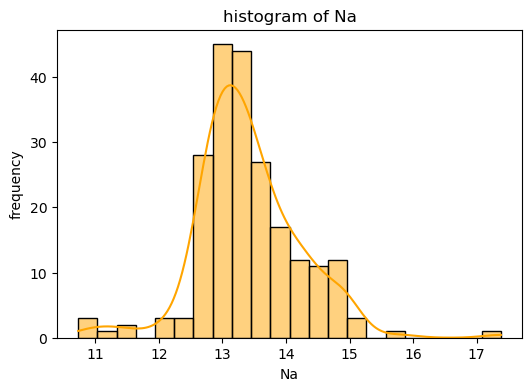

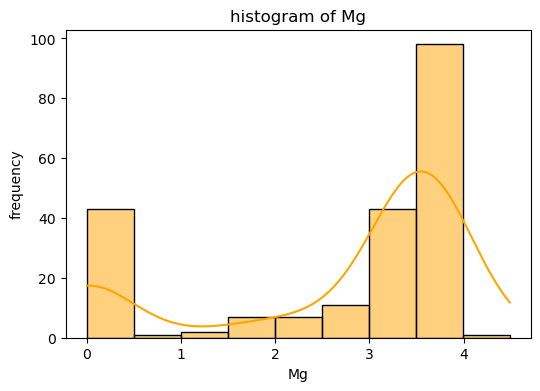

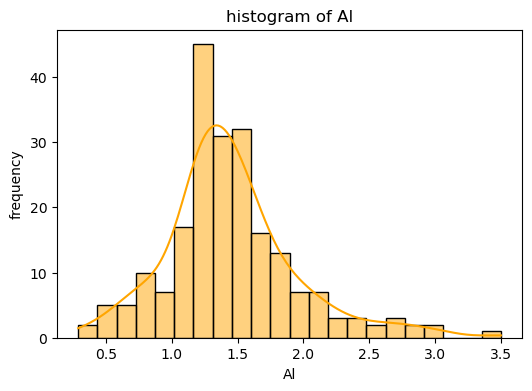

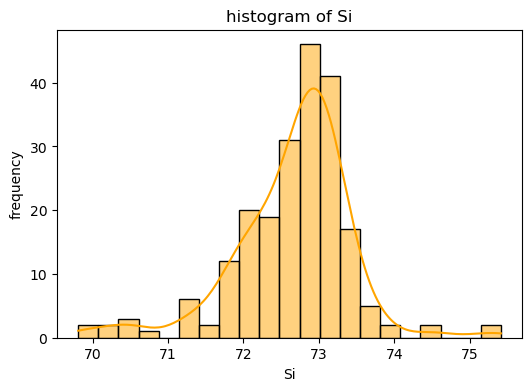

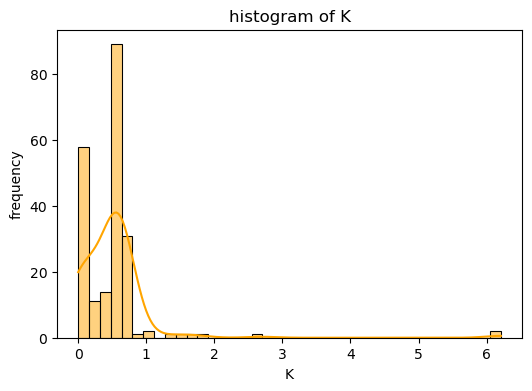

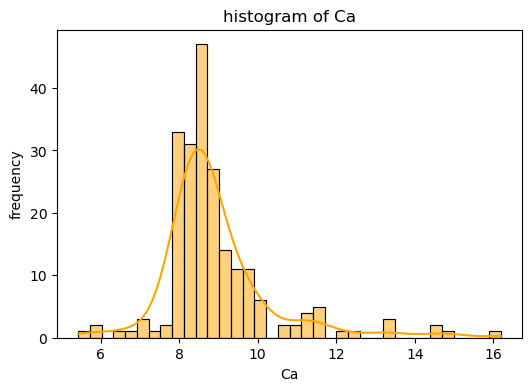

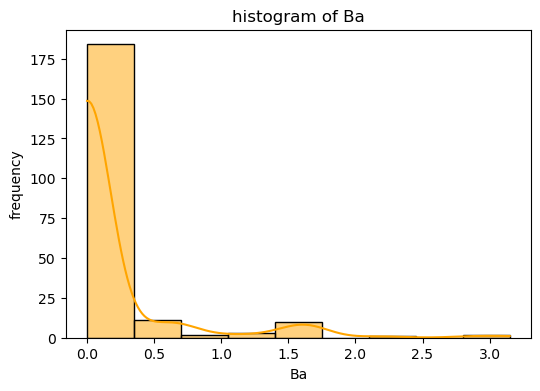

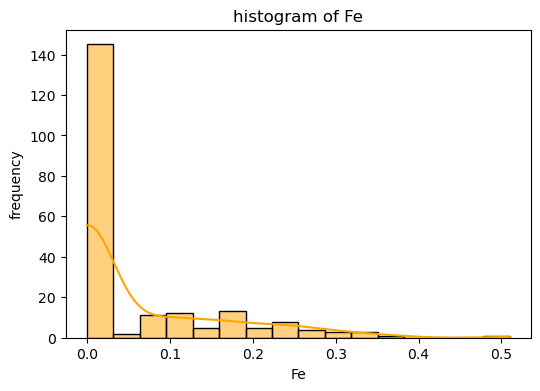

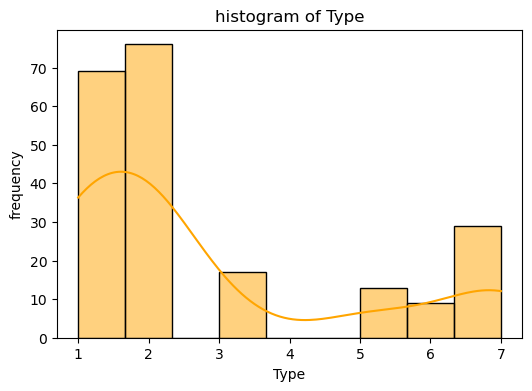

In [16]:
#creating histogram

for col in data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],kde=True,color='orange',edgecolor='black')
    plt.title(f'histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

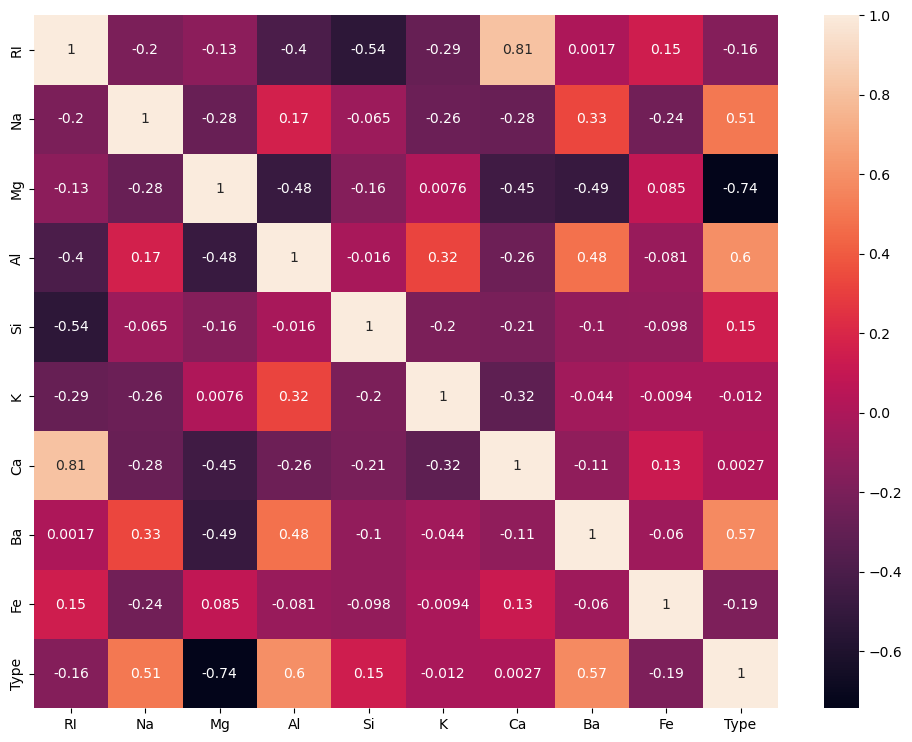

In [17]:
#correlation heatmap

plt.figure(figsize=(12,9))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

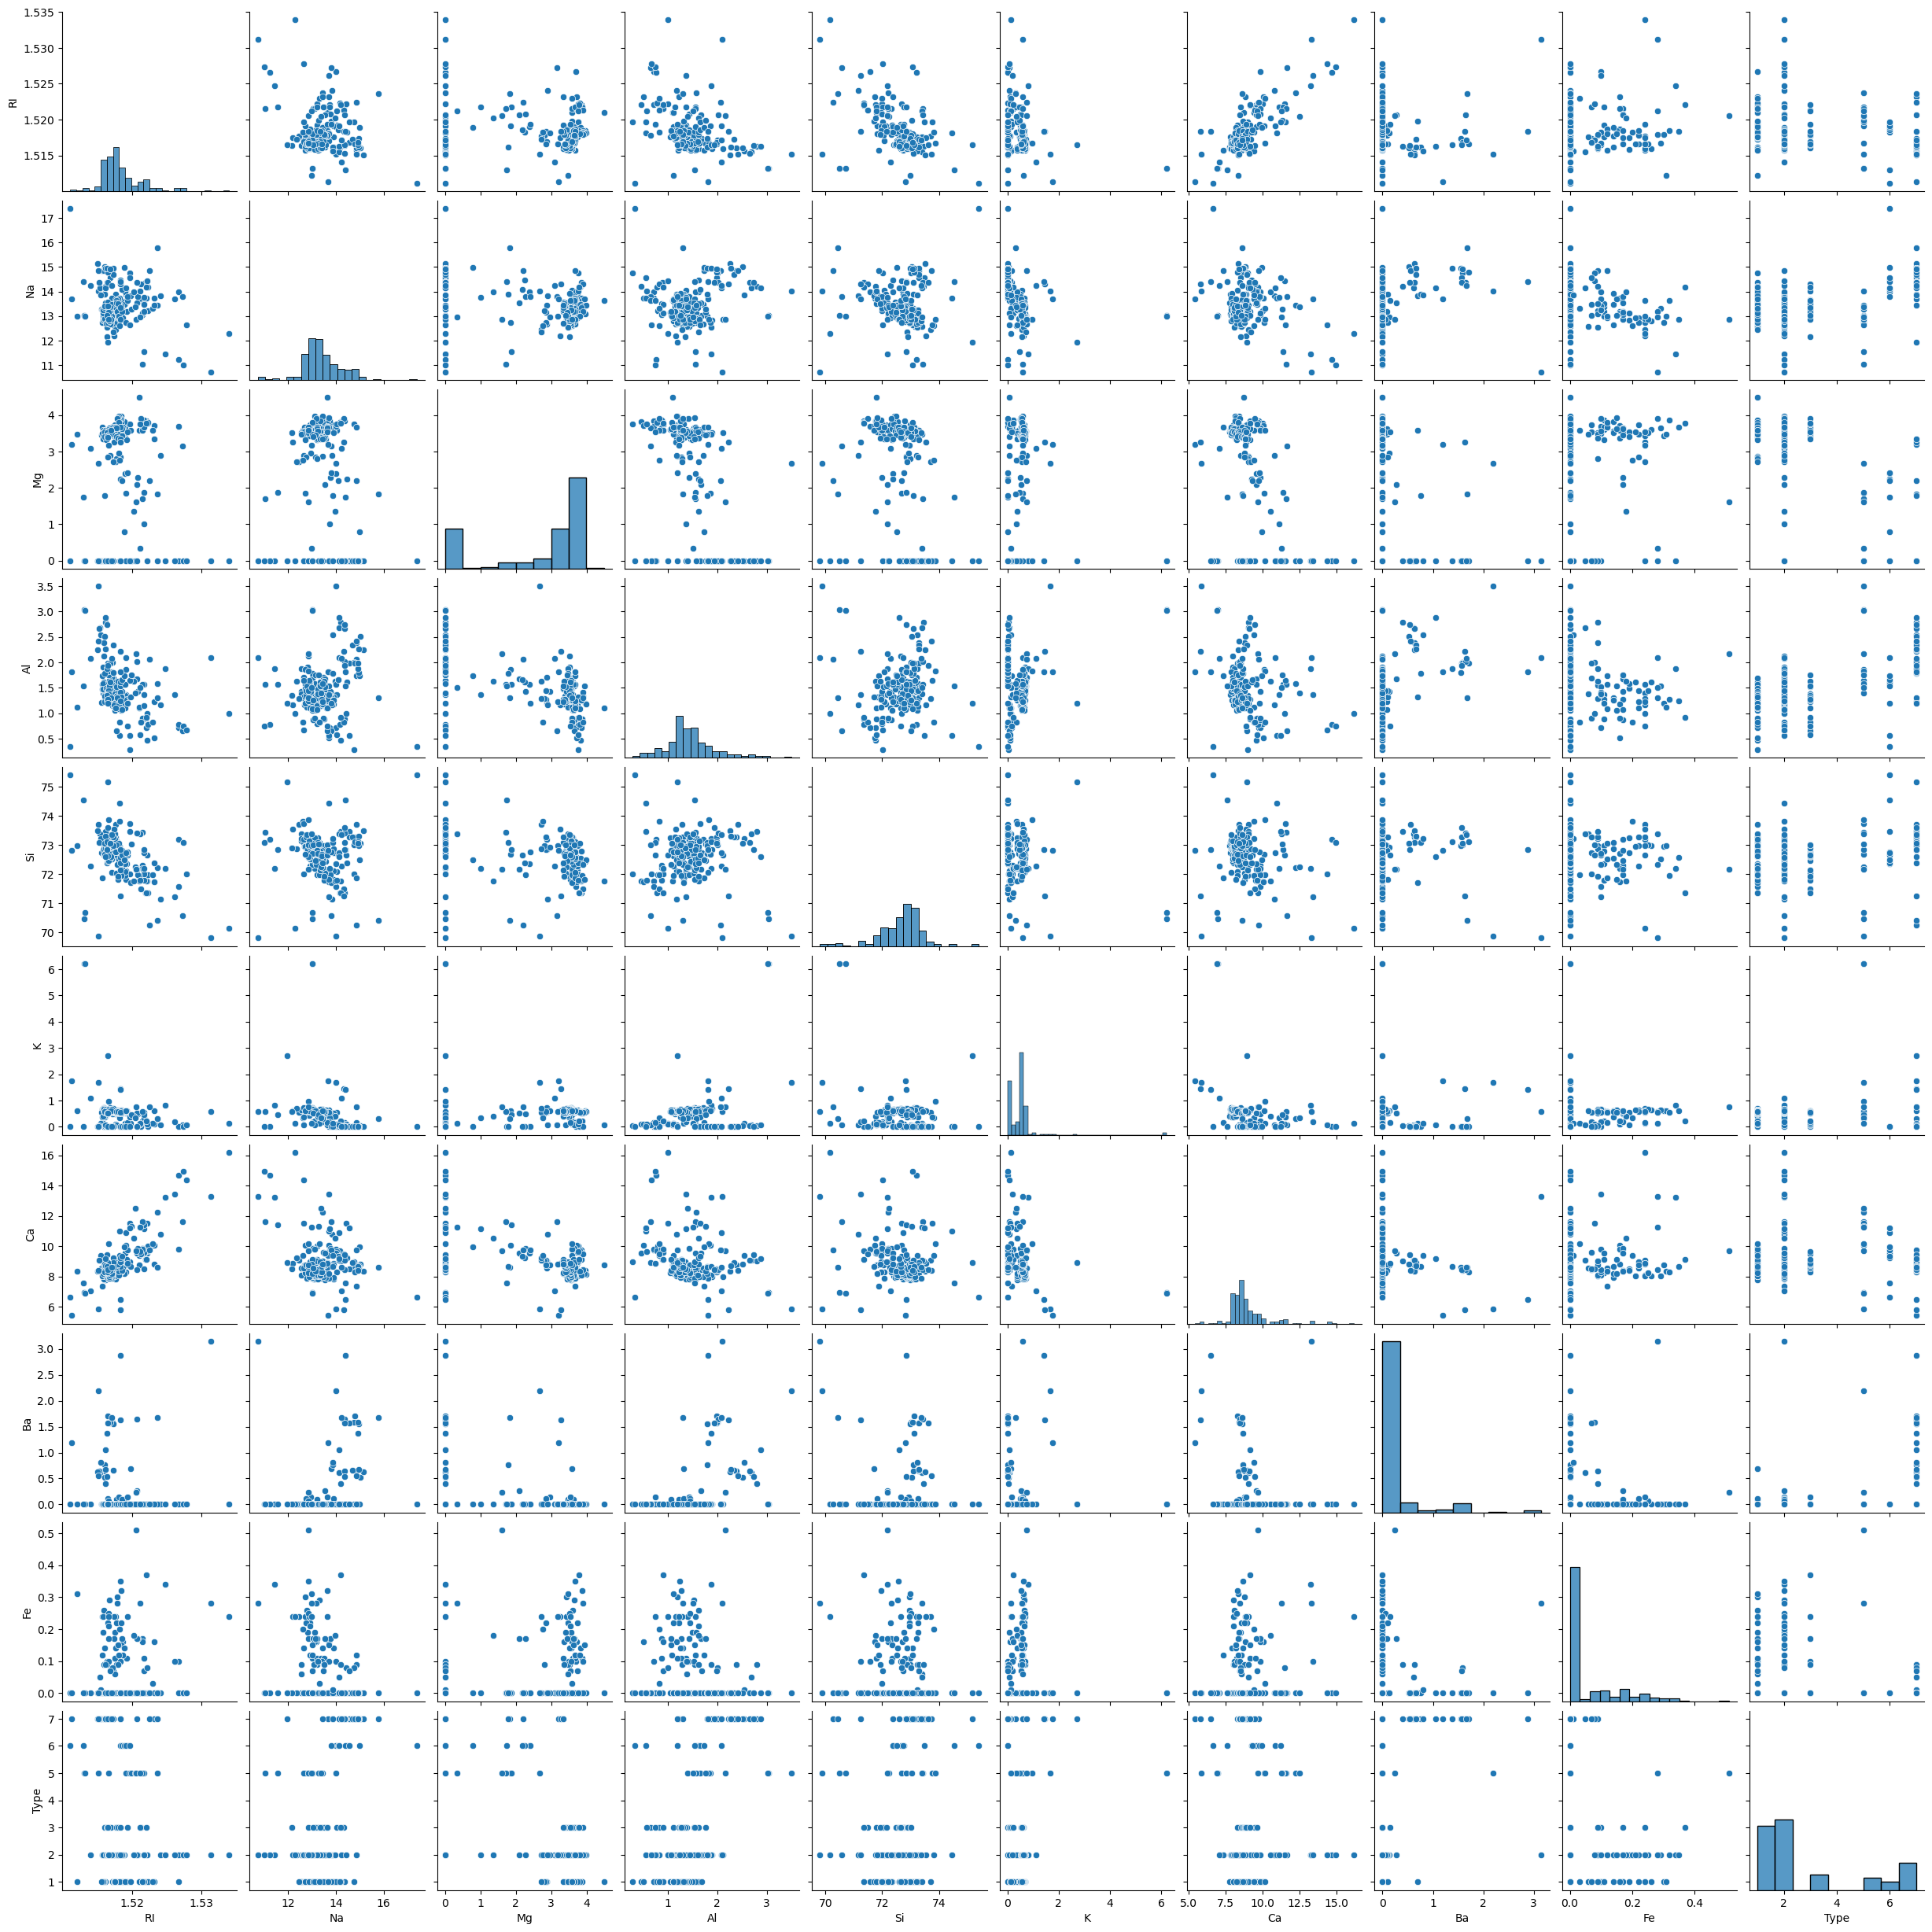

In [18]:
#pairplot

sns.pairplot(data)
plt.show()

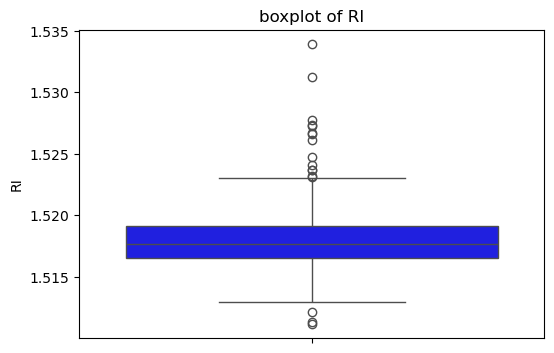

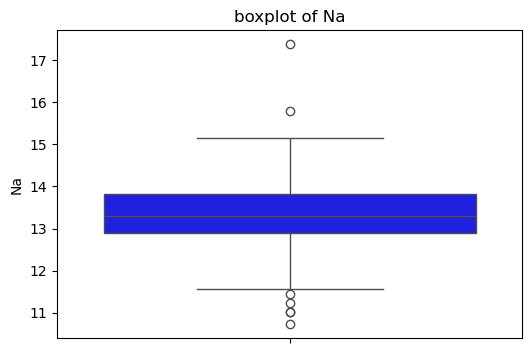

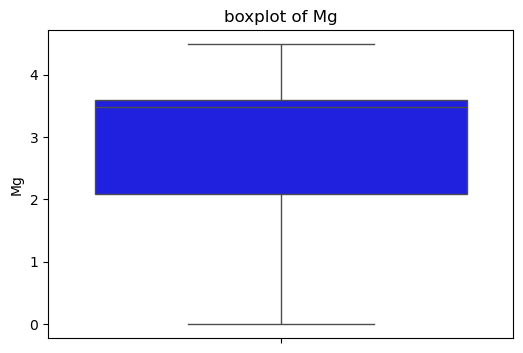

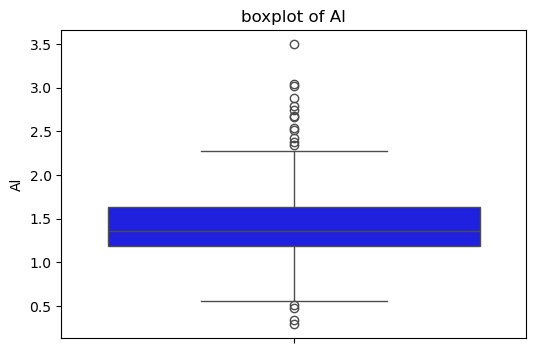

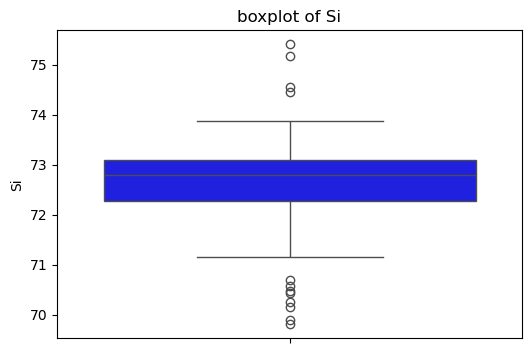

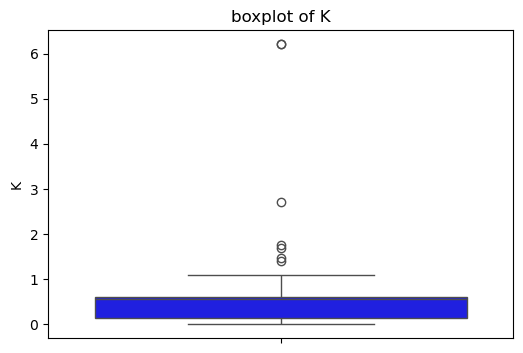

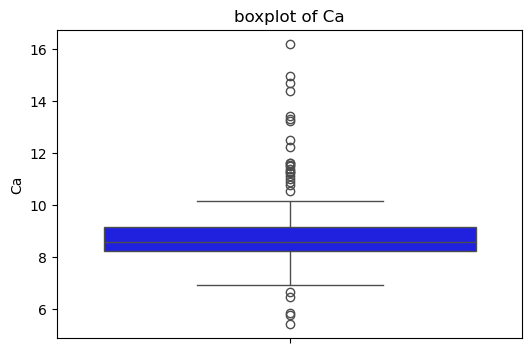

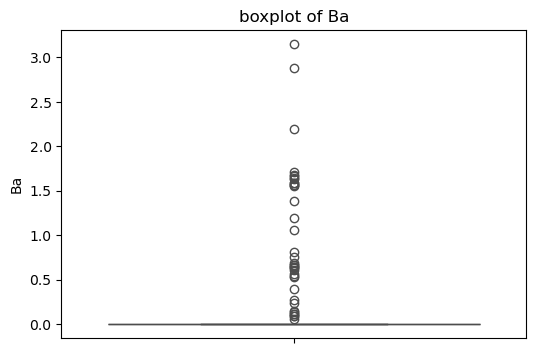

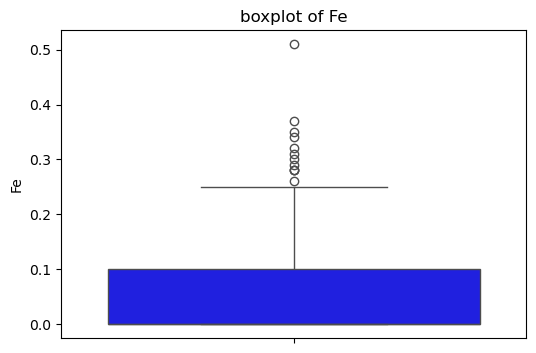

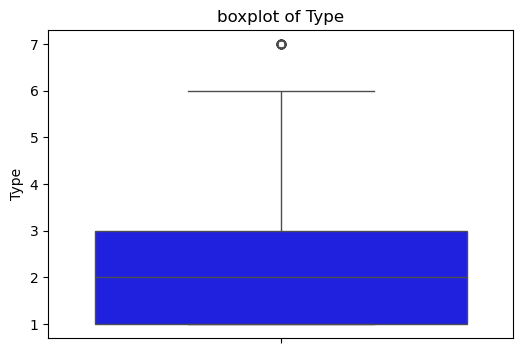

In [19]:
#Create boxplots.

for col in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col],color='blue')
    plt.title(f'boxplot of {col}')
    plt.show()

#### 3: Data Preprocessing

In [21]:
X = data.drop('Type',axis=1)
y = data['Type']

##### standardization

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Handling the imbalance data

In [25]:
print(y.value_counts())

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X_scaled,y)

In [28]:
print('before SMOTE : ',y.value_counts())
print('after SMOTE : ',pd.Series(y_resampled).value_counts())


before SMOTE :  Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64
after SMOTE :  Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


#### 4: Random Forest Model Implementation

##### Divide the data into train and test split.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42,stratify=y_resampled)

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((364, 9), (92, 9), (364,), (92,))

##### Implement Random Forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

##### Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [36]:
def evaluate_model(name,y_true,y_pred):
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred,average='weighted'))
    print('Recall:',recall_score(y_test,y_pred,average='weighted'))
    print('F1=score:',f1_score(y_test,y_pred,average='weighted'))
    print('classification report:',classification_report(y_test,y_pred))
    print('confusion matrix:')
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

Accuracy: 0.9239130434782609
Precision: 0.9251746894409938
Recall: 0.9239130434782609
F1=score: 0.9242274024278183
classification report:               precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.93      0.87      0.90        15
           3       0.93      0.93      0.93        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.92        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.93      0.92      0.92        92

confusion matrix:


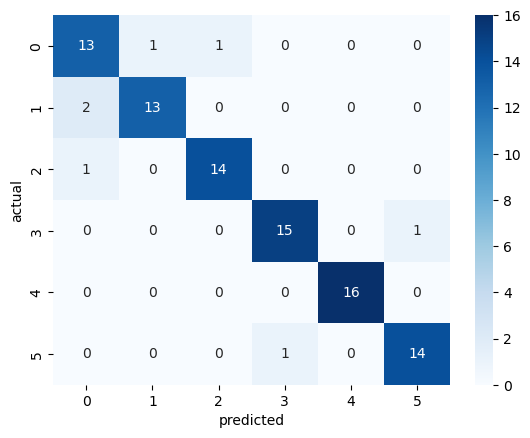

In [37]:
evaluate_model('Random Forest',y_test,y_pred)

#### 5: Bagging and Boosting Methods

In [38]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
bagging =BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,random_state=42
)

In [40]:
bagging.fit(X_train,y_train)
y_pred_bag = bagging.predict(X_test)

In [41]:
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=0.8,
    random_state=42
)

In [42]:
adaboost.fit(X_train,y_train)
y_pred_boost = adaboost.predict(X_test)

##### Evaluate both models

Accuracy: 0.8913043478260869
Precision: 0.8913166437143419
Recall: 0.8913043478260869
F1=score: 0.8903670546377419
classification report:               precision    recall  f1-score   support

           1       0.75      0.80      0.77        15
           2       0.85      0.73      0.79        15
           3       0.93      0.93      0.93        15
           5       0.94      0.94      0.94        16
           6       0.94      1.00      0.97        16
           7       0.93      0.93      0.93        15

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92

confusion matrix:


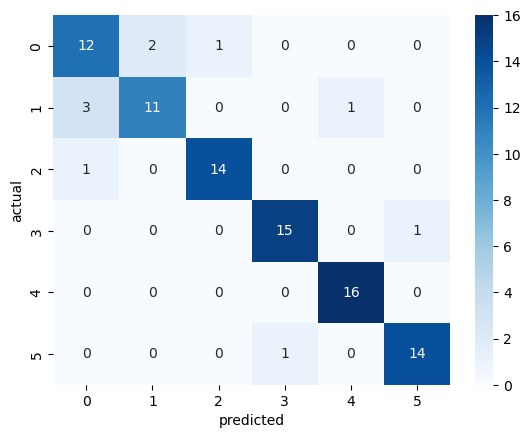

In [43]:
evaluate_model('BaggingClassifier',y_test,y_pred_bag)

Accuracy: 0.8260869565217391
Precision: 0.8358375034576406
Recall: 0.8260869565217391
F1=score: 0.8247411499241466
classification report:               precision    recall  f1-score   support

           1       0.67      0.80      0.73        15
           2       0.79      0.73      0.76        15
           3       0.83      0.67      0.74        15
           5       0.92      0.75      0.83        16
           6       1.00      1.00      1.00        16
           7       0.79      1.00      0.88        15

    accuracy                           0.83        92
   macro avg       0.83      0.82      0.82        92
weighted avg       0.84      0.83      0.82        92

confusion matrix:


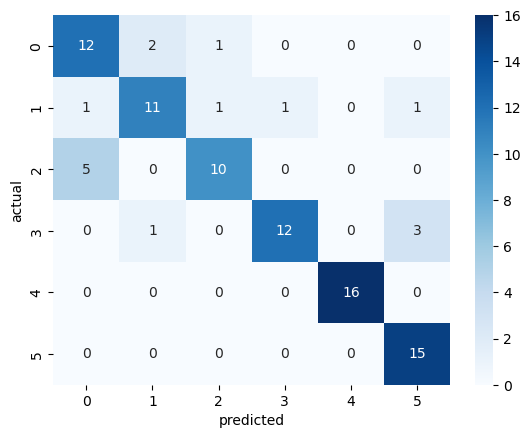

In [44]:
evaluate_model('BoostClassifier',y_test,y_pred_boost)

##### 1. Explain Bagging and Boosting methods. How is it different from each other.
###### bagging trains multiple model independently on random subsets of data and combines their results to reduce variance
###### bossting trains model sequentaially, where each model focuses on correcting the errors of the previous ones, reducing bias

##### 2. Explain how to handle imbalance in the data.
###### handling imbalance in data involves ensuring all classes are fairly represented so the model dosen't favor majority classes
###### common methods includes:
###### oversampling (SMOTE) = generate synthetic samples for minority classes
###### undersampling = reduce samples from majority classes
###### class weighting = assign higher weights to minority classes during training